In [ ]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
x_points = np.array([[1,1,2,3,4,5,6,7,8,9,10,11]]) 
y_points = np.array([[1,2,3,1,4,5,6,4,7,10,15,9]]) 

In [ ]:
m = x_points.shape[1]

In [ ]:
theta0 = 0
theta1 = np.random.randn(1,1) * 0.01

### Batch

In [ ]:
y_predicted = (theta1 * x_points) + theta0
error = y_predicted - y_points
iteration = 0
learning_rate = 0.001
cost_list = []
cost = (np.sum(error)**2) / 2 * m

In [ ]:
while(iteration <= 50 and cost > 0.001):
    cost = (np.sum(error)**2) / 2 * m
    cost_list.append(cost)
    theta0 = theta0 - (learning_rate * (np.sum(error)/ m))
    theta1 = theta1 - (learning_rate * (np.sum(error * x_points) / m))
    y_predicted = (theta1 * x_points) + theta0
    error = y_predicted - y_points
    iteration += 1

Text(0.5, 1.0, 'Model cost vs Epochs')

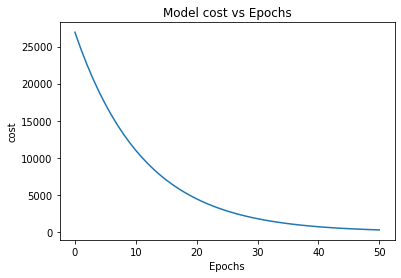

In [ ]:
x = range(0, len(cost_list))
plt.plot(x, cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

In [ ]:
final_predicted_y = (theta1 * x_points) + theta0

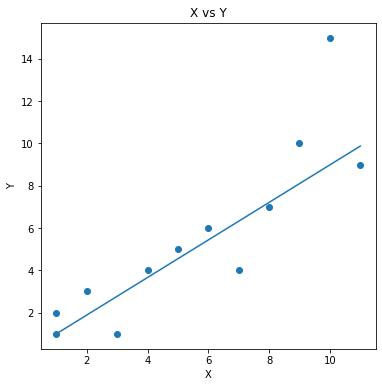

In [ ]:
plt.figure(figsize=(6, 6))
ax = plt.axes()
plt.scatter(x_points, y_points)
plt.plot(x_points[0], final_predicted_y[0])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')
plt.show()

In [ ]:
#Using r2 score from sklearn.metrics to evaluate prediction performance.
r2_score(y_points[0],final_predicted_y[0])

0.7246707251881235

### Mini-Batch

In [ ]:
batch = 2
number_of_images_per_batch = m // batch

In [ ]:
epoch = 0
learning_rate = 0.001
cost_list = []
theta0 = 0
theta1 = np.random.randn(1,1) * 0.01
error = (theta1 * x_points[0][0:number_of_images_per_batch] + theta0) - y_points[0][0:number_of_images_per_batch]
cost = (np.sum(error)**2) / 2 * number_of_images_per_batch

In [ ]:
while(epoch <= 50 and cost > 0.001):
    for iteration in range(batch):
        start = iteration * number_of_images_per_batch
        end = (iteration * number_of_images_per_batch) + number_of_images_per_batch
        error = (theta1 * x_points[0][start : end] + theta0) - y_points[0][start : end]
        cost = (np.sum(error)**2) / 2 * number_of_images_per_batch
        cost_list.append(cost)
        theta0 = theta0 - (learning_rate * (np.sum(error)/ number_of_images_per_batch))
        theta1 = theta1 - (learning_rate * (np.sum(error * x_points[0][start : end]) / number_of_images_per_batch))
    epoch += 1

Text(0.5, 1.0, 'Model cost vs Iterations')

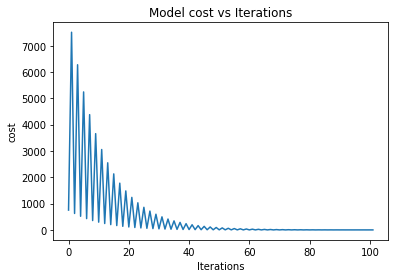

In [ ]:
x = range(0, len(cost_list))
plt.plot(x, cost_list)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Model cost vs Iterations')

In [ ]:
final_predicted_y = (theta1 * x_points) + theta0

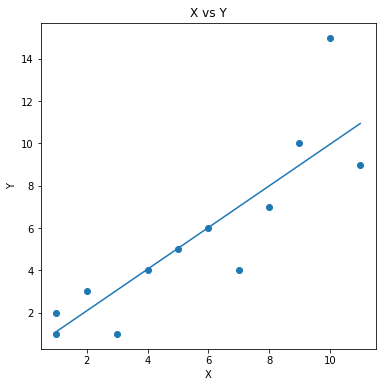

In [ ]:
plt.figure(figsize=(6, 6))
ax = plt.axes()
plt.scatter(x_points, y_points)
plt.plot(x_points[0], final_predicted_y[0])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')
plt.show()

In [ ]:
r2_score(y_points[0],final_predicted_y[0])

0.7554015673615738

### Stochastic

In [ ]:
epoch = 0
learning_rate = 0.001
cost_list = []
theta0 = 0
theta1 = np.random.randn(1,1) * 0.01
error = (theta1 * x_points[0][0] + theta0) - y_points[0][0]
cost = (np.sum(error)**2) 
error

array([[-0.9935652]])

In [ ]:
while(epoch <= 50 and cost > 0.001):
    for iteration in range(m):
        error = (theta1 * x_points[0][iteration] + theta0) - y_points[0][iteration]
        cost = (np.sum(error)**2) 
        cost_list.append(cost)
        theta0 = theta0 - (learning_rate * (np.sum(error)))
        theta1 = theta1 - (learning_rate * (np.sum(error * x_points[0][iteration])))
    epoch += 1

Text(0.5, 1.0, 'Model cost vs Iterations')

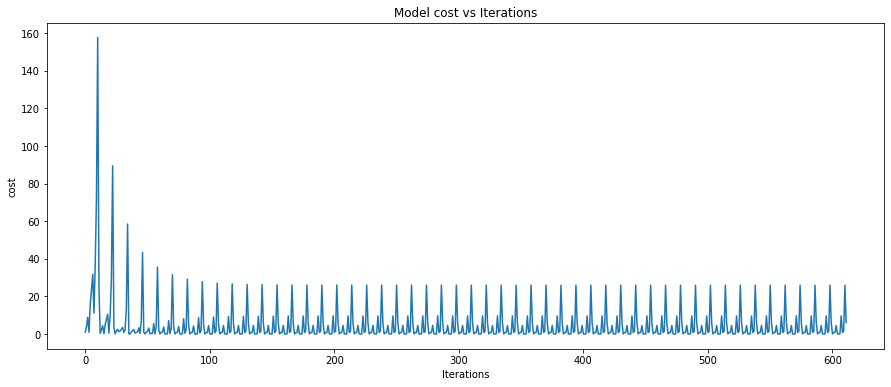

In [ ]:
plt.figure(figsize=(15, 6))
x = range(0, len(cost_list))
plt.plot(x, cost_list)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Model cost vs Iterations')

In [ ]:
final_predicted_y = (theta1 * x_points) + theta0

In [ ]:
r2_score(y_points[0],final_predicted_y[0])

0.7558462727794171

### For the batch GD try to make it momentum-based GD.

In [ ]:
theta0 = 0
theta1 = np.random.randn(1,1) * 0.01

In [ ]:
y_predicted = (theta1 * x_points) + theta0
error = y_predicted - y_points
iteration = 0
learning_rate = 0.001
gamma = 0.9
v_prev0 = 0
v_prev1 = 0
cost_list = []
cost = (np.sum(error)**2) / 2 * m

In [ ]:
while(iteration <= 50 and cost > 0.001):
    cost = (np.sum(error)**2) / 2 * m
    cost_list.append(cost)
    v_current0 = gamma * v_prev0 + learning_rate * (np.sum(error)/ m) 
    v_current1 = gamma * v_prev1 + learning_rate * (np.sum(error * x_points) / m) 
    theta0 = theta0 - v_current0
    theta1 = theta1 - v_current1
    y_predicted = (theta1 * x_points) + theta0
    error = y_predicted - y_points
    v_prev0 = v_current0
    v_prev1 = v_current1
    iteration += 1

Text(0.5, 1.0, 'Model cost vs Epochs')

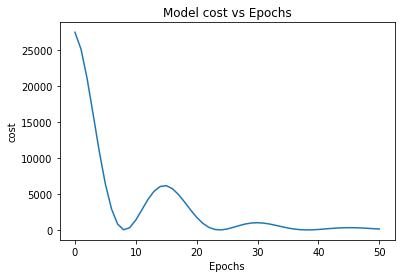

In [ ]:
x = range(0, len(cost_list))
plt.plot(x, cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

In [ ]:
final_predicted_y = (theta1 * x_points) + theta0

In [ ]:
r2_score(y_points[0],final_predicted_y[0])

0.7516720095881504

### NAG algorithm

In [ ]:
theta0 = 0
theta1 = np.random.randn(1,1) * 0.01

In [ ]:
y_predicted = (theta1 * x_points) + theta0
error = y_predicted - y_points
iteration = 0
gamma = 0.9
learning_rate = 0.001
cost_list = []
cost = (np.sum(error)**2) / 2 * m
v_prev0 = 0
v_prev1 = 0

In [ ]:
while(iteration <= 50 and cost > 0.001):
    theta0 = theta0 - gamma * v_prev0
    theta1 = theta1 - gamma * v_prev1
    
    y_predicted = (theta1 * x_points) + theta0
    error = y_predicted - y_points
    
    theta0 = theta0 - (learning_rate * (np.sum(error)/ m))
    theta1 = theta1 - (learning_rate * (np.sum(error * x_points) / m))
    
    v_prev0 = gamma * v_prev0 + (learning_rate * (np.sum(error)/ m))
    v_prev1 = gamma * v_prev1 + (learning_rate * (np.sum(error * x_points) / m))
    
    y_predicted = (theta1 * x_points) + theta0
    error = y_predicted - y_points
    cost = (np.sum(error)**2) / 2 * m
    cost_list.append(cost)

    iteration += 1

Text(0.5, 1.0, 'Model cost vs Epochs')

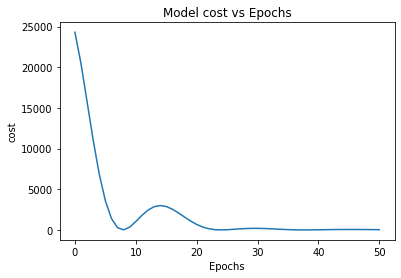

In [ ]:
x = range(0, len(cost_list))
plt.plot(x, cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

In [ ]:
final_predicted_y = (theta1 * x_points) + theta0

In [ ]:
r2_score(y_points[0],final_predicted_y[0])

0.7550294503387185